In [1]:
%load_ext autoreload
%autoreload 2

In [11]:

import torch
import pickle
import numpy as np
from pathlib import Path
import sys

from learning import StateEncoder, initialize_encoder_random
from problems import GridworldProblem
from policies import GreedyPolicy
from omegaconf import OmegaConf
import copy
from typing import Optional, Callable, List
from experiments.load_model import load_model
import matplotlib.pyplot as plt

from planning import WaypointPlanner

In [ ]:
def print_results(paths):
    """
    Plot training metrics overlayed for multiple experiment paths.
    
    Args:
        paths: List of tuples (label, path) or list of paths (will use path as label)
    """
    # Normalize input to list of (label, path) tuples
    if isinstance(paths, list) and len(paths) > 0:
        if isinstance(paths[0], tuple):
            path_list = paths
        else:
            path_list = [(path, path) for path in paths]
    else:
        raise ValueError("paths must be a list of paths or list of (label, path) tuples")
    
    # Load all data
    all_data = []
    for label, path in path_list:
        model = load_model(path + '/model.pt')
        with open(path + '/results.pkl', 'rb') as file:
            results = pickle.load(file)
        with open(path + '/training_history.pkl', 'rb') as file:
            history = pickle.load(file)
        all_data.append((label, model, results, history))
    
    # Print keys from first experiment
    print("Results keys:", all_data[0][2].keys())   
    print("History keys:", all_data[0][3].keys())
    
    # Plot Training Loss
    plt.figure(figsize=(10, 6))
    for label, model, results, history in all_data:
        plt.plot(history['loss'][:], label=label)
    plt.title('Training Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()
    
    # Plot Success Rate
    plt.figure(figsize=(10, 6))
    for label, model, results, history in all_data:
        plt.plot(history['success_rate'], label=label)
    plt.title('Success Rate')
    plt.xlabel('Epoch')
    plt.ylabel('Success Rate')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()
    
    # Plot Mean Path Length
    plt.figure(figsize=(10, 6))
    for label, model, results, history in all_data:
        plt.plot(history['mean_path_length'], label=label)
    plt.title('Mean Path Length')
    plt.xlabel('Epoch')
    plt.ylabel('Mean Path Length')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()
    
def test_rollout(path):
    model = load_model(path + '/model.pt')
    with open(path + '/results.pkl', 'rb') as file:
        # Load the object from the pickle file
        results = pickle.load(file)
    config = model['config']  
    env = GridworldProblem(config.env.K, config.env.N, config.env.O, config.env.r, config.seed)
    
    policy = GreedyPolicy(model['encoder'], model['policy'])
    start_state, goal_state = env.reset()
    # planner = WaypointPlanner(start=start_state, goal=goal_state, policy=)

Successfully loaded model from: results/100x10/i/model.pt
Configuration:
  Environment: K=100, N=10, O=0
  Model: latent_dim=64, hidden_dims=[64, 64]
  Waypoint type: i
  Seed: 123
Successfully loaded model from: results/100x10/c/model.pt
Configuration:
  Environment: K=100, N=10, O=0
  Model: latent_dim=64, hidden_dims=[64, 64]
  Waypoint type: c
  Seed: 123
Successfully loaded model from: results/100x10/n/model.pt
Configuration:
  Environment: K=100, N=10, O=0
  Model: latent_dim=64, hidden_dims=[64, 64]
  Waypoint type: n
  Seed: 123
Results keys: dict_keys(['config', 'results'])
History keys: dict_keys(['epochs', 'loss', 'accuracy', 'l2', 'learning_rate', 'temperature', 'success_rate', 'mean_path_length', 'eval_epochs'])


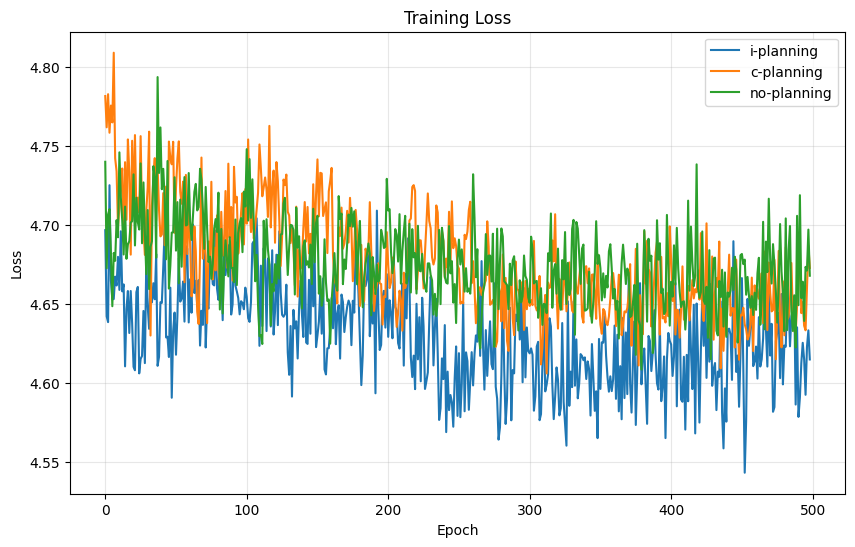

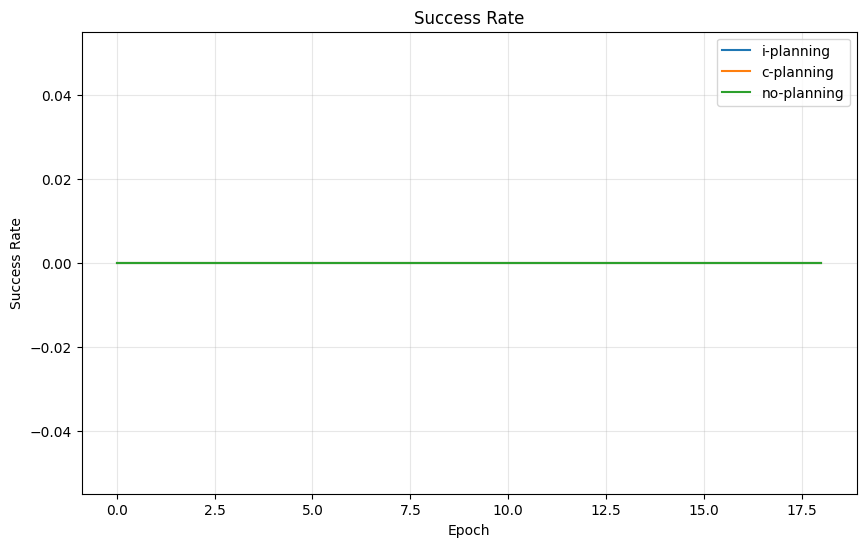

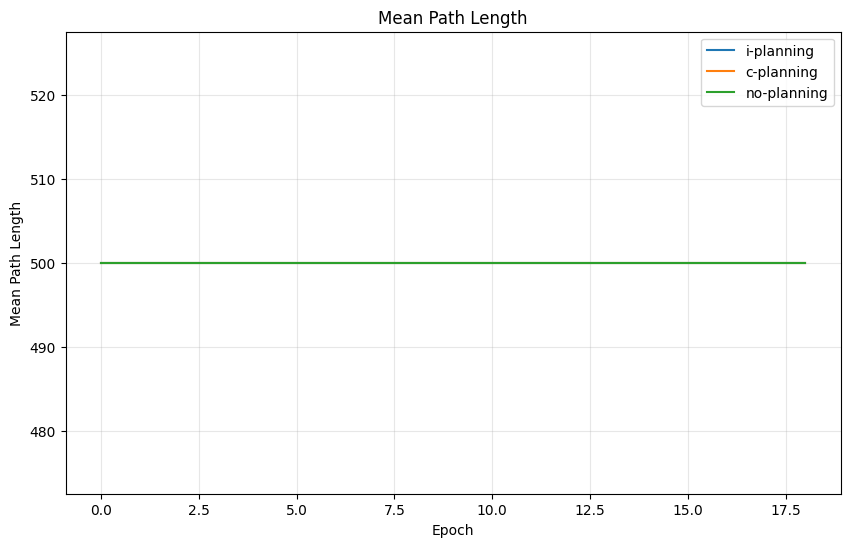

In [ ]:
# Compare all three experiments with labels
# experiment dirs

# problem = '100x2'
problem = '50x5'
# problem = '100x10'
# i_path = 'results/50x5/i'
# c_path = 'results/50x5/c'
# n_path = 'results/50x5/n'
i_path = f'results/{problem}/i'
c_path = f'results/{problem}/c'
n_path = f'results/{problem}/n'

print_results([
    ('i-planning', i_path),
    ('c-planning', c_path),
    ('no-planning', n_path),
    
])